In [15]:
# 1.1 Import tensorflow and other libraries
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

In [16]:
# 1.2 Create input data using numpy. y = x * 0.1 + 0.3 + noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale = 0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

# Plot input data
# pylab.plot(x_data, y_data, '.')

In [17]:
# 1.3 Build inference graph
# Create variables W and b that compute y_data = W * x_data _ b
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# See W and b
print(W)
print(b)

<tf.Variable 'Variable_2:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(1,) dtype=float32_ref>


In [18]:
print(y)

Tensor("add_1:0", shape=(100,), dtype=float32)


In [19]:
# 1.4 Bulid training graph
loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()

# see what 'loss', 'optimizer' and 'train'
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)
print(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
loss: Tensor("Mean_1:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x00000000070A5DD8>
train: name: "GradientDescent_1"
op: "NoOp"
input: "^GradientDescent_1/update_Variable_2/ApplyGradientDescent"
input: "^GradientDescent_1/update_Variable_3/ApplyGradientDescent"

name: "init_1"
op: "NoOp"
input: "^Variable/Assign"
input: "^Variable_1/Assign"
input: "^Variable_2/Assign"
input: "^Variable_3/Assign"



In [20]:
# 1.5 See what we have built
#print(tf.get_default_graph().as_graph_def())

In [21]:
#1.6 Craete a session and launch graph
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)

# see the initial W and b values
print(sess.run([W, b]))

[array([ 0.8766278], dtype=float32), array([ 0.], dtype=float32)]


In [22]:
#1.7 Perform training
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run([W, b]))

print(sess.run([W, b]))

0 [array([ 0.76499522], dtype=float32), array([-0.0998015], dtype=float32)]
20 [array([ 0.29513437], dtype=float32), array([ 0.19284134], dtype=float32)]
40 [array([ 0.1564132], dtype=float32), array([ 0.26880002], dtype=float32)]
60 [array([ 0.11671599], dtype=float32), array([ 0.29053676], dtype=float32)]
80 [array([ 0.10535603], dtype=float32), array([ 0.29675704], dtype=float32)]
100 [array([ 0.10210519], dtype=float32), array([ 0.29853711], dtype=float32)]
120 [array([ 0.1011749], dtype=float32), array([ 0.29904649], dtype=float32)]
140 [array([ 0.10090869], dtype=float32), array([ 0.29919225], dtype=float32)]
160 [array([ 0.10083251], dtype=float32), array([ 0.29923397], dtype=float32)]
180 [array([ 0.10081072], dtype=float32), array([ 0.29924589], dtype=float32)]
200 [array([ 0.10080448], dtype=float32), array([ 0.29924932], dtype=float32)]
[array([ 0.10080448], dtype=float32), array([ 0.29924932], dtype=float32)]


(0, 1.0)

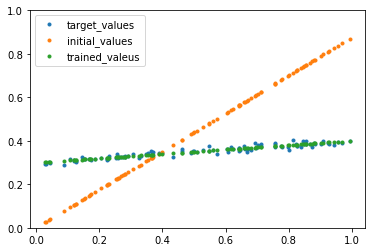

In [23]:
#1.8 Compare
pylab.plot(x_data, y_data, '.', label = "target_values")
pylab.plot(x_data, y_initial_values, '.', label = "initial_values")
pylab.plot(x_data, sess.run(y), '.', label = "trained_valeus")
pylab.legend()
pylab.ylim(0, 1.0)